In [1]:
# sklearn 버전 확인
import sklearn
print(sklearn.__version__)

1.0.2


In [ ]:
# sklearn 업데이트
#!`pip install -U scikit-learn

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

In [3]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality_simple.csv'
data = pd.read_csv(path)

<img src = "https://github.com/Jangrae/img/blob/master/code_12.png?raw=true" width=700 align="left"/>

In [4]:
# 상위 몇 개 행 확인
data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190.0,7.4,67,5,1
1,36,118.0,8.0,72,5,2
2,12,149.0,12.6,74,5,3
3,18,313.0,11.5,62,5,4
4,19,NaN,14.3,56,5,5


In [5]:
# 하위 몇 개 행 확인
data.tail()

,Ozone,Solar.R,Wind,Temp,Month,Day
148,30,193.0,6.9,70,9,26
149,23,145.0,13.2,77,9,27
150,14,191.0,14.3,75,9,28
151,18,131.0,8.0,76,9,29
152,20,223.0,11.5,68,9,30


In [7]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    int64  
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 7.3 KB


In [6]:
# 기초통계량 확인
data.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,153.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.052288,185.931507,9.957516,77.882353,6.993464,15.803922
std,30.156127,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,20.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,34.000000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,59.000000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [8]:
# 상관관계 확인
data.corr()

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.280068,-0.605478,0.683372,0.174197,0.004419
Solar.R,0.280068,1.000000,-0.056792,0.275840,-0.075301,-0.150275
Wind,-0.605478,-0.056792,1.000000,-0.457988,-0.178293,0.027181
Temp,0.683372,0.275840,-0.457988,1.000000,0.420947,-0.130593
Month,0.174197,-0.075301,-0.178293,0.420947,1.000000,-0.007962
Day,0.004419,-0.150275,0.027181,-0.130593,-0.007962,1.000000


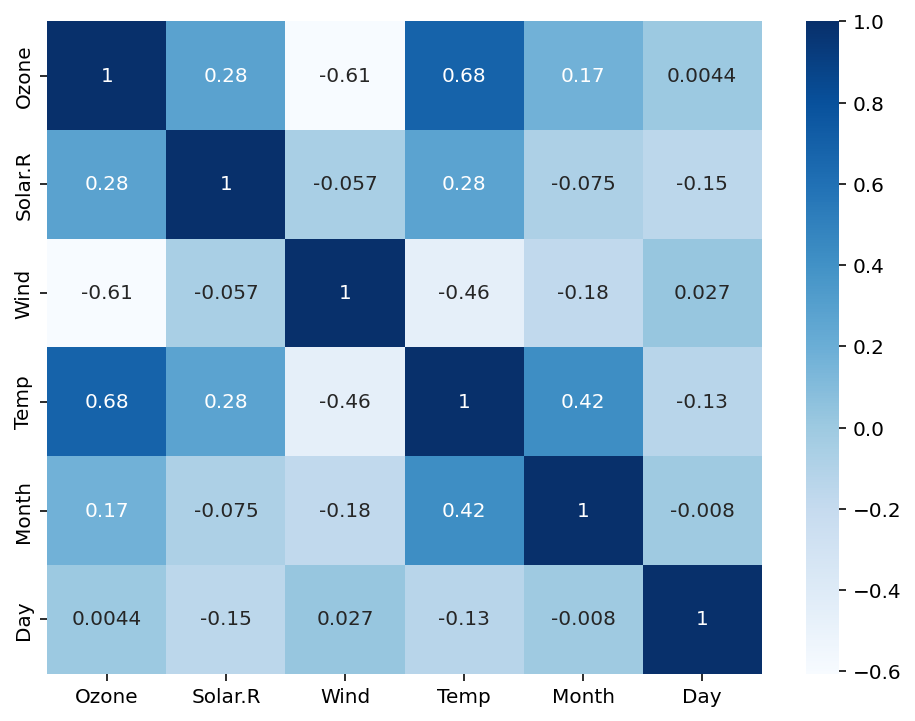

In [12]:
# 상관관계 시각화
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.show()

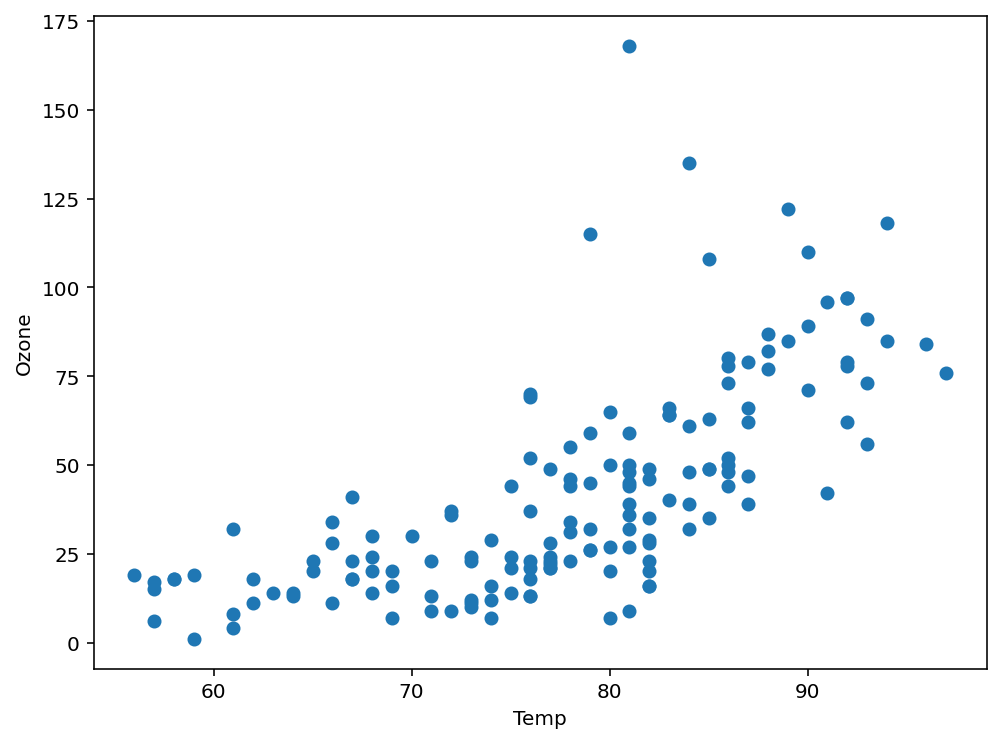

In [15]:
# Temp --> Ozone 상관관계
plt.figure(figsize=(8,6))
plt.scatter(data['Temp'], data['Ozone'])
plt.xlabel('Temp')
plt.ylabel('Ozone')
plt.show()

# 3.데이터 준비

- **전처리** 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_13.png?raw=true" width=700 align="left"/>

**1) 결측치 처리**

In [16]:
# 결측치 확인
data.isna().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [17]:
# 선형보간법으로 Solar.R 결측치 채우기
data.interpolate(method='linear', inplace=True)

# 확인
data.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

**2) 불필요한 변수 제거**

In [18]:
# 불필요한 변수 Month, Day 제거
col_x = ['Month', 'Day']
data.drop(col_x, axis=1, inplace=True)

# 확인
data.head()

,Ozone,Solar.R,Wind,Temp
0,41,190.000000,7.4,67
1,36,118.000000,8.0,72
2,12,149.000000,12.6,74
3,18,313.000000,11.5,62
4,19,308.333333,14.3,56


**3) x, y 분리**

In [19]:
# target 확인
target = 'Ozone'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

**4) 학습용, 평가용 데이터 분리**

In [24]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

In [25]:
x_train.head()

,Solar.R,Wind,Temp
44,332.0,13.8,80
129,252.0,10.9,80
115,212.0,9.7,79
102,137.0,11.5,86
142,201.0,8.0,82


# 4.모델링

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.
- 우선 **회귀** 문제인지 **분류** 문제인지 명확히 구분합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_14.png?raw=true" width=700 align="left"/>

**1) 모델링**

- 오존농도 예측 → **<font color='red'>회귀 문제</font>**
- 알고리즘: LinearRegression
- 평가지표: mean_absolute_error

In [26]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [27]:
# 2단계: 선언하기
model = LinearRegression()

In [29]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LinearRegression()

In [30]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [35]:
# 예측 값
y_pred[:10]

array([ 48.12371224,  30.2811346 ,  68.54137402,  81.12849771,
        50.31714601,  66.68007439,  29.52408212,  58.10190808,
       -26.12512944, -22.652056  ])

In [41]:
# 실제 값
y_test[:10].values

array([71, 26, 76, 84, 40, 79, 44, 89,  8,  6], dtype=int64)

In [37]:
# 5단계: 평가하기
mean_absolute_error(y_test, y_pred)

13.445749810271392

**2) 예측값과 실제값 시각화 비교**

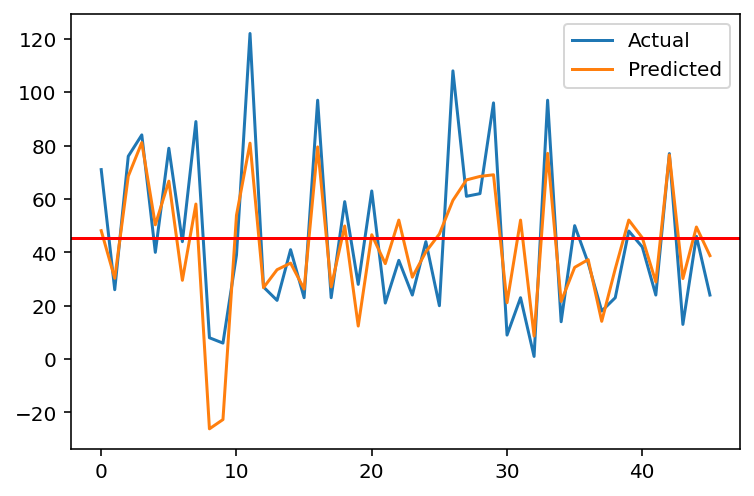

In [47]:
# 예측값 시각화 비교
mean_ozone = y_test.mean()
plt.plot(y_test.values)
plt.plot(y_pred)
plt.axhline(mean_ozone, color='r')
plt.legend(['Actual', 'Predicted'])
plt.show()